<a href="https://colab.research.google.com/github/sumeet6510/IPL-T20-Analysis/blob/main/Individual_IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_location = '/content/drive/MyDrive/Colab Notebooks/Capstone Project/Capstone Project 1/IPL/'
df_matches = pd.read_csv(file_location + 'Copy of matches.csv')
df_teams = pd.read_csv(file_location +'Copy of teams.csv')
df_teamwise = pd.read_csv(file_location +'Copy of teamwise_home_and_away.csv')
df_deliveries = pd.read_csv(file_location +'Copy of deliveries.csv')
df_mostruns = pd.read_csv(file_location +'Copy of most_runs_average_strikerate.csv')
df_players = pd.read_excel(file_location +'Copy of Players.xlsx')

In [ ]:
df_matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5dd7cd5350>,
      dtype=object)

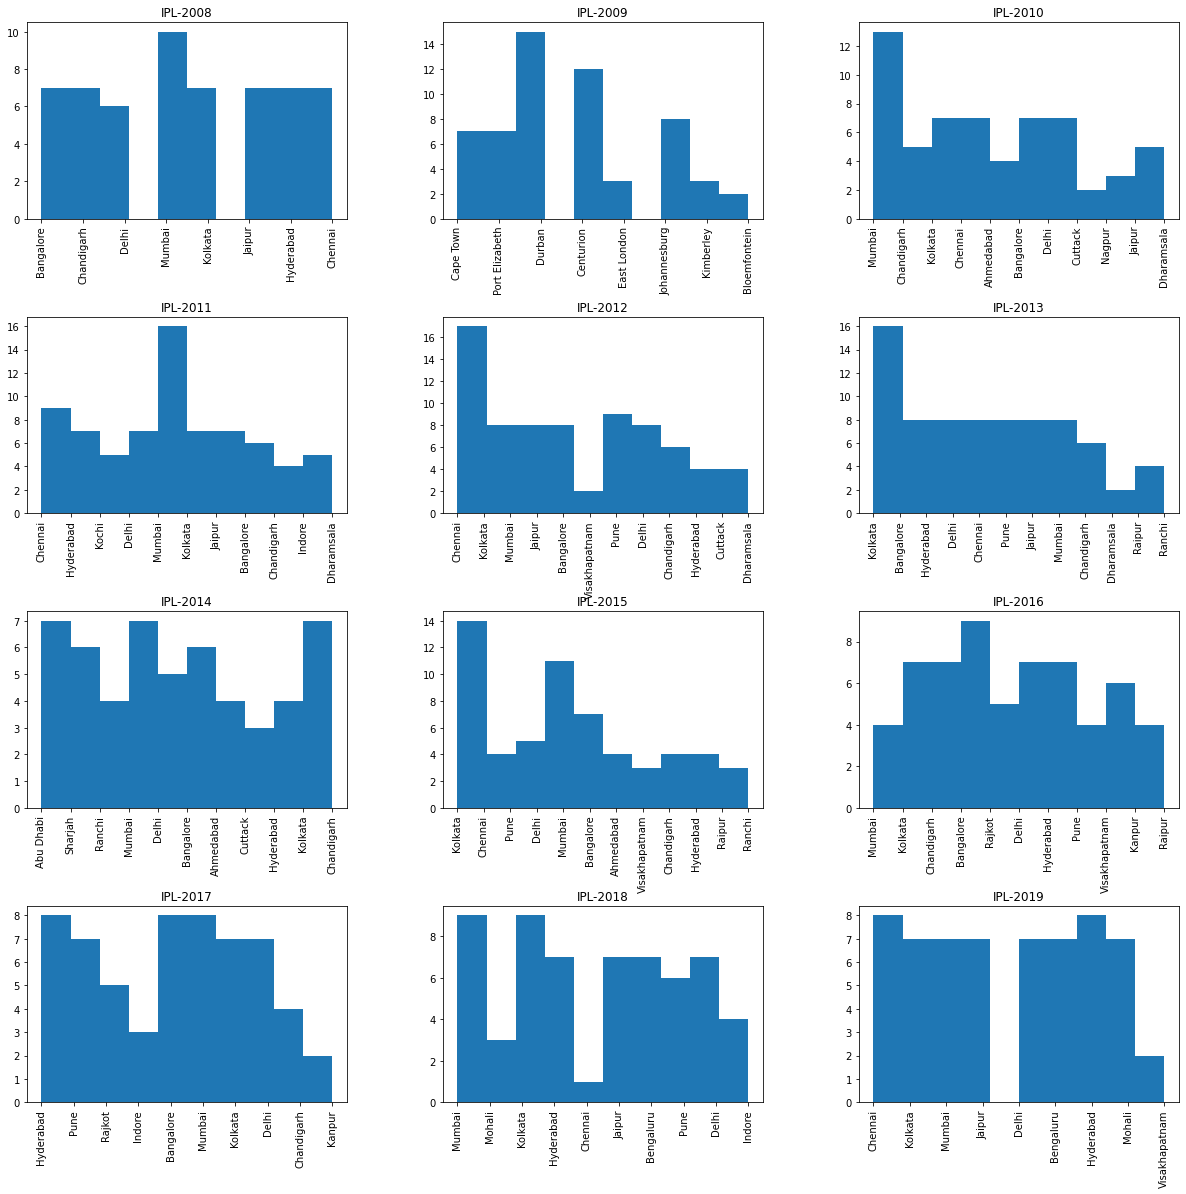

In [ ]:
df_matches.hist(by='Season', column='city', figsize=(20,20))


In [ ]:
df_teams

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions
5,Chennai Super Kings
6,Rising Pune Supergiants
7,Delhi Daredevils
8,Deccan Chargers
9,Delhi Capitals


From Teams csv we can see that some teams have different names. For example **Delhi Daredevils** and **Delhi Capitals** So we have to make name common to these teams.

In [ ]:
#codes for making names common
def change_name(data):
    if data=='Delhi Daredevils':
        data='Delhi Capitals'
    elif data=='Deccan Chargers':
        data='Sunrisers Hyderabad'
    elif data=='Pune Warriors' or data=='Rising Pune Supergiant':
        data='Rising Pune Supergiants'
    return data

df_matches['team1']=df_matches['team1'].apply(lambda x:change_name(x))
df_matches['team2']=df_matches['team2'].apply(lambda x:change_name(x))
df_matches['toss_winner']=df_matches['toss_winner'].apply(lambda x:change_name(x))
df_matches['winner']=df_matches['winner'].apply(lambda x:change_name(x))

## Exploring dataset teamwise_home_and_away.csv

In [ ]:
df_teamwise

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632


In above code df_teamwise, here we also saw some team have two different names. So for proper data calculation we have to merge this teams. Firstly we change the names to common name then add that particular row to common one row.

In [ ]:
# create a copy of df_teamwise
df_teamwise_copy = df_teamwise.copy()

In [ ]:
# For changing name of team
df_teamwise_copy['team']=df_teamwise_copy['team'].apply(lambda x:change_name(x))

In [ ]:
df_teamwise_updated = df_teamwise_copy.groupby(['team'], as_index=False).agg('sum')
df_teamwise_updated

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Chennai Super Kings,51,49,89,75,57.303371,65.333333
1,Delhi Capitals,28,49,78,99,84.722222,117.191011
2,Gujarat Lions,1,12,14,16,7.142857,75.000000
3,Kings XI Punjab,38,44,91,85,41.758242,51.764706
4,Kochi Tuskers Kerala,2,4,7,7,28.571429,57.142857
5,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632
6,Mumbai Indians,58,51,101,86,57.425743,59.302326
7,Rajasthan Royals,29,46,67,80,43.283582,57.500000
8,Rising Pune Supergiants,11,11,28,34,92.500000,85.576923
9,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947


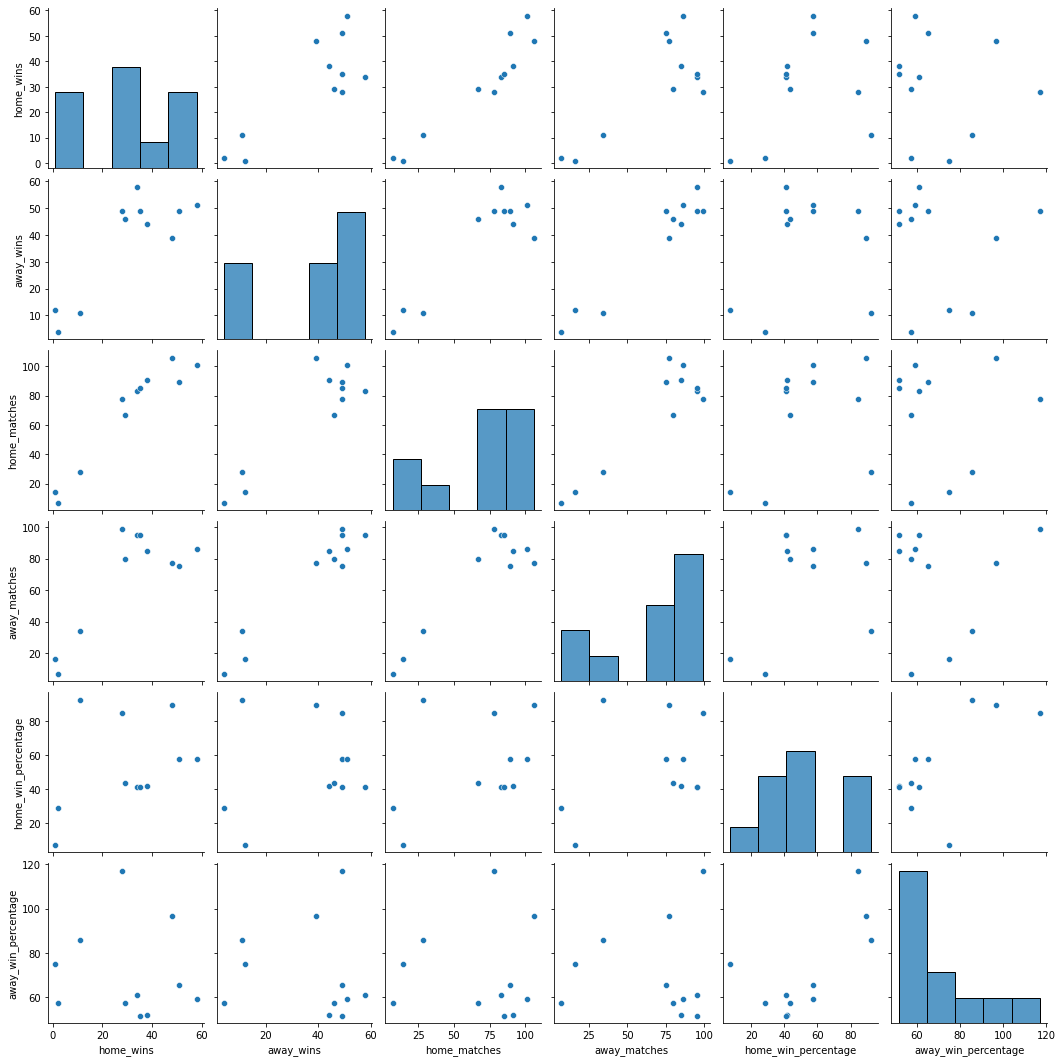

In [ ]:
sns.pairplot(df_teamwise_updated)

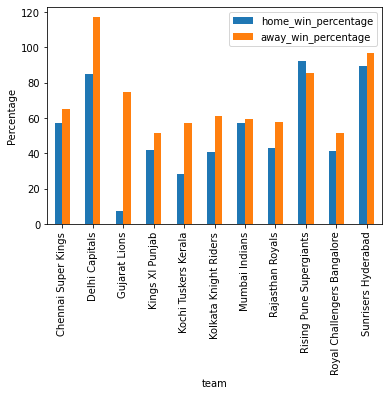

In [ ]:
df_teamwise_updated.plot(x="team", y=["home_win_percentage", "away_win_percentage"], kind="bar")
plt.ylabel('Percentage')
plt.show()

**Conclusions from above plot**

From above Pair plot and bar graph we can compare teams on the basis of Home win percent and Away win percent. From graph we can conclude that all teams have good winning percent in Away (except 'Rising Pune Supergiants' and 'Mumbai Indians'). For **'Rising Pune Supergiants' has home win percent higher** and **'Mumbai Indians' has home win percent and Away win percent is almost equal**.

## Now exploring the dataframe of batsman according to their performance i.e. - total runs scored, average and strike rate.

In [ ]:
df_mostruns.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


In [ ]:
df_mostruns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        482 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


In [ ]:
# creating copy of df_mostruns 
df_mostruns_copy = df_mostruns.copy()

we saw there is some Nan values in average column. So try to replacing with 0.

In [ ]:
# replace Nan values with 0
df_mostruns_copy = df_mostruns.replace(np.nan,0)

Now try to find to 10 most run scorer and players having top 10 averages.

In [ ]:
df_mostruns_score = df_mostruns_copy.sort_values(['total_runs'], ascending=False)
df_mostruns_score.head(10)

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
5,CH Gayle,4525,110,2972,41.136364,152.254374
6,MS Dhoni,4450,118,3206,37.711864,138.802246
7,RV Uthappa,4420,156,3381,28.333333,130.730553
8,AB de Villiers,4414,104,2902,42.442308,152.101999
9,G Gambhir,4219,134,3400,31.485075,124.088235


<Figure size 1080x288 with 0 Axes>

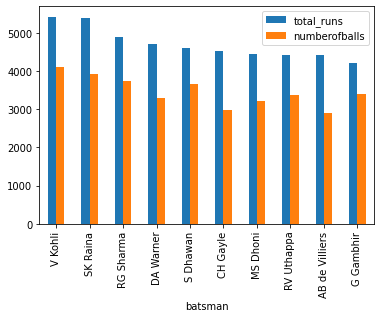

In [ ]:
plt.figure(figsize=(15,4))
df_mostruns_copy.iloc[0:10].plot(x="batsman", y=['total_runs','numberofballs'], kind = 'bar')
#plt.ylabel('Total Runs')
plt.show()

In [ ]:
df_mostruns_average = df_mostruns_copy.sort_values(['average'], ascending=False)
df_mostruns_dataframe_avg = df_mostruns_average.loc[df_mostruns_average['total_runs'] > 1000]
df_mostruns_dataframe_avg.head(10)

,batsman,total_runs,out,numberofballs,average,strikerate
8,AB de Villiers,4414,104,2902,42.442308,152.101999
30,JP Duminy,2031,49,1633,41.448980,124.372321
3,DA Warner,4717,114,3292,41.377193,143.286756
5,CH Gayle,4525,110,2972,41.136364,152.254374
61,ML Hayden,1107,27,802,41.000000,138.029925
31,KL Rahul,1988,49,1428,40.571429,139.215686
65,LMP Simmons,1079,27,851,39.962963,126.792009
55,KS Williamson,1309,34,964,38.500000,135.788382
22,SE Marsh,2489,65,1866,38.292308,133.386924
32,MEK Hussey,1977,52,1608,38.019231,122.947761


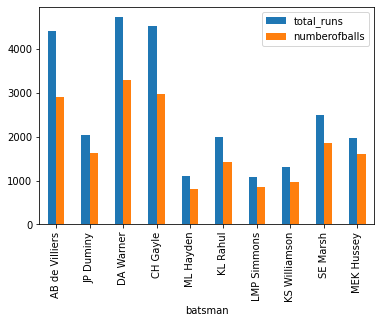

In [ ]:
df_mostruns_dataframe_avg.iloc[0:10].plot(x="batsman", y=['total_runs','numberofballs'], kind = 'bar')
#plt.ylabel('Total Runs')
plt.show()

In [ ]:
df_mostruns_strikerate = df_mostruns_copy.sort_values(['strikerate'], ascending=False)
df_mostruns_dataframe_strike = df_mostruns_strikerate.loc[df_mostruns_average['total_runs'] > 1000]
df_mostruns_dataframe_strike.head(10)

,batsman,total_runs,out,numberofballs,average,strikerate
49,AD Russell,1415,41,752,34.512195,188.164894
38,RR Pant,1767,49,1071,36.061224,164.985994
50,GJ Maxwell,1401,62,864,22.596774,162.152778
64,HH Pandya,1082,38,689,28.473684,157.039187
20,V Sehwag,2728,98,1746,27.836735,156.242841
5,CH Gayle,4525,110,2972,41.136364,152.254374
8,AB de Villiers,4414,104,2902,42.442308,152.101999
52,JC Buttler,1396,37,919,37.729730,151.904244
18,KA Pollard,2772,102,1879,27.176471,147.525279
14,YK Pathan,3222,110,2240,29.290909,143.839286


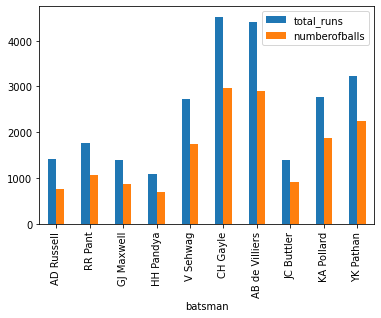

In [ ]:
df_mostruns_dataframe_strike.iloc[0:10].plot(x="batsman", y=['total_runs','numberofballs'], kind = 'bar')
#plt.ylabel('Total Runs')
plt.show()

From above plots we can find top 10 players having **most runs, top 10 highest average and top 10 highest strikerate** in IPL. Also we find that players having highest average and highest strikerate should played minimum 1000 balls. Because we can saw that some players who play only 100 balls have very high average and high strikerate. So, for better comparison we put a criteria of minimum 1000 balls.

## Looking data set of players

In [ ]:
df_players.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


In [ ]:
df_players_count = df_players.groupby('Country')['Player_Name'].count().reset_index()
df_players_count.head()

,Country,Player_Name
0,Australia,72
1,Bangladesh,5
2,England,14
3,India,264
4,Netherlands,1


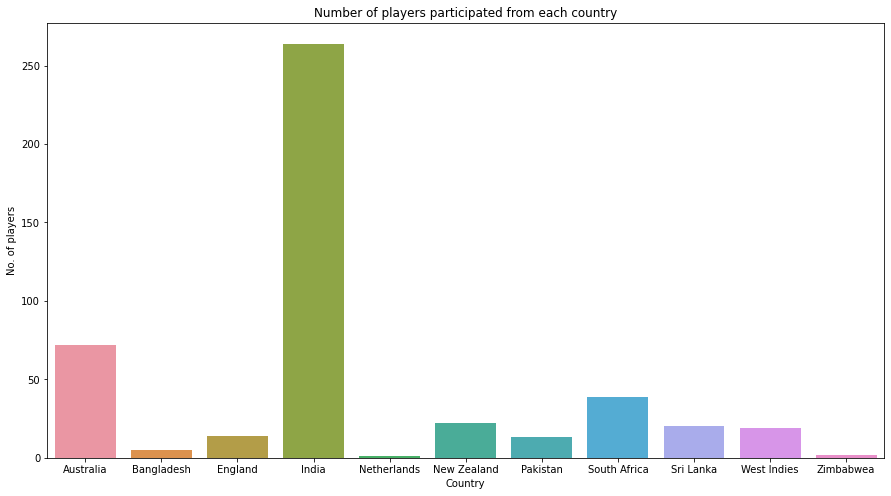

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(y=df_players_count['Player_Name'],x=df_players_count['Country'])
plt.title('Number of players participated from each country')
plt.xlabel('Country')
plt.ylabel('No. of players')
plt.show()

Conclusion from player.xlxs file

From this graph we can conclude that from **India** most no. of players had participated followed by **Australia and South Africa**

## Summary

When I start to exploring **most_run_team_stikerate.csv** file, then I found important features such as: **batsman, total_runs, numberofballs, average and strikerate**. In this total_runs explain the total runs made by batsman in its IPL career. Average and strikerate gives information of average and strikerate 
of each player. By this information I can find to 10 players on the basis of their average, runs and strikerate. So, I started plotting bar graph and with the help of this graph I can show the results in this project.

Also, when I start exploring **teamwise_home_and_away.csv** then I came to know that this csv dataset has data of home win percent and away win percent of each teams. Important features of this csv are **teams, home_wins, home_matches, away_win, away_matches, home_win_percent and away_win_percent**. In this dataset I found out which team is good at home ground and which team is good at away ground.
